Library Importing

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


Data Cleaning, Processing and Engineering

In [3]:
# Step 1: Import Libraries

# Step 2: Load Datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Step 3: Basic Overview of Each Dataset
# Customers Dataset
print("Customers Dataset Info:")
print(customers.info())
print("\nSample Data:\n", customers.head())
print("\nSummary Statistics:\n", customers.describe(include="all"))

# Products Dataset
print("\nProducts Dataset Info:")
print(products.info())
print("\nSample Data:\n", products.head())
print("\nSummary Statistics:\n", products.describe(include="all"))

# Transactions Dataset
print("\nTransactions Dataset Info:")
print(transactions.info())
print("\nSample Data:\n", transactions.head())
print("\nSummary Statistics:\n", transactions.describe(include="all"))

# Step 4: Check for Missing Values and Duplicates
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

print("\nDuplicate Records:")
print("Customers Duplicates:", customers.duplicated().sum())
print("Products Duplicates:", products.duplicated().sum())
print("Transactions Duplicates:", transactions.duplicated().sum())

# Step 5: Merge Datasets for Comprehensive EDA
# Merging on CustomerID and ProductID
merged_data = pd.merge(transactions, customers, on="CustomerID", how="inner")
merged_data = pd.merge(merged_data, products, on="ProductID", how="inner")

print("\nMerged Data Info:")
print(merged_data.info())
print("\nSample Merged Data:\n", merged_data.head())

# Drop Price_x and Price_y, create Price from Price_x
if 'Price_x' in merged_data.columns and 'Price_y' in merged_data.columns:
    merged_data['Price'] = merged_data['Price_x']
    merged_data = merged_data.drop(['Price_x', 'Price_y'], axis=1)


print("\nMerged Data Info:")
print(merged_data.info())
print("\nSample Merged Data:\n", merged_data.head())

# Extract product ID
merged_data['ProductID'] = merged_data['ProductID'].str.extract('(\d+)')
merged_data['TransactionID'] = merged_data['TransactionID'].str.extract('(\d+)')
merged_data['CustomerID'] = merged_data['CustomerID'].str.extract('(\d+)')

for col in ['TransactionID', 'CustomerID', 'ProductID']:
    try:
        merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')
    except KeyError:
        print(f"Column '{col}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred while converting '{col}': {e}")

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Sample Data:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Summary Statistics:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4  

Trend Analysis

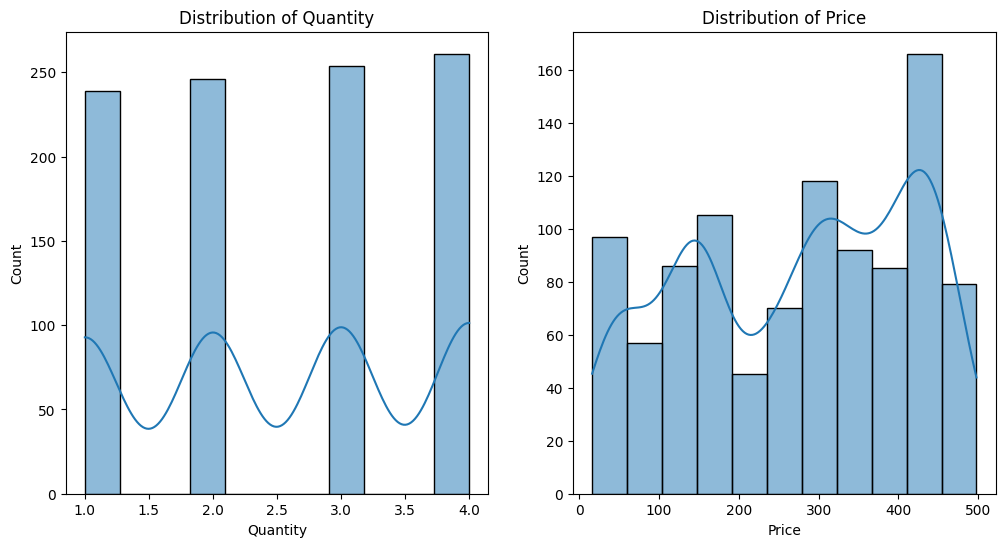

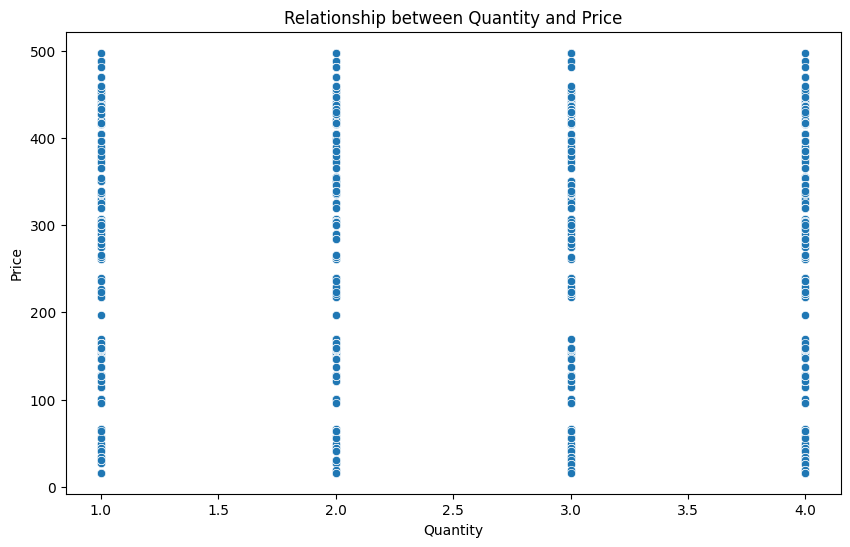

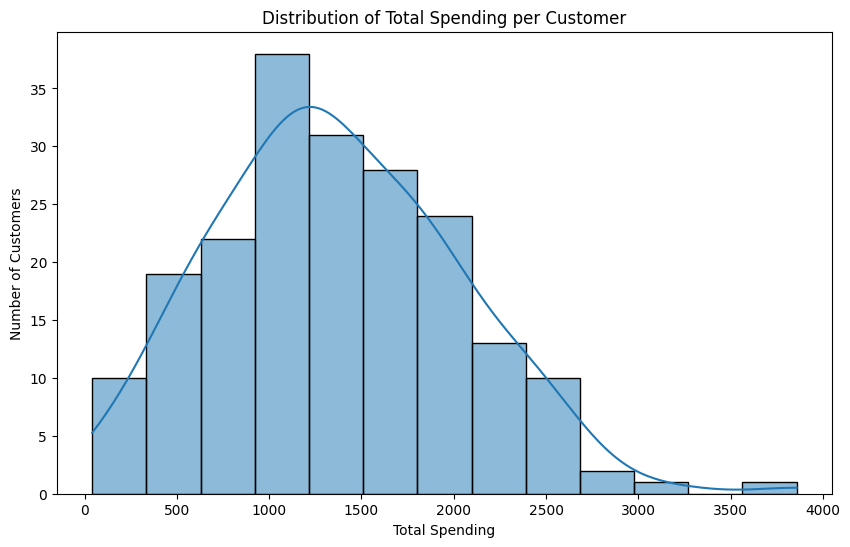

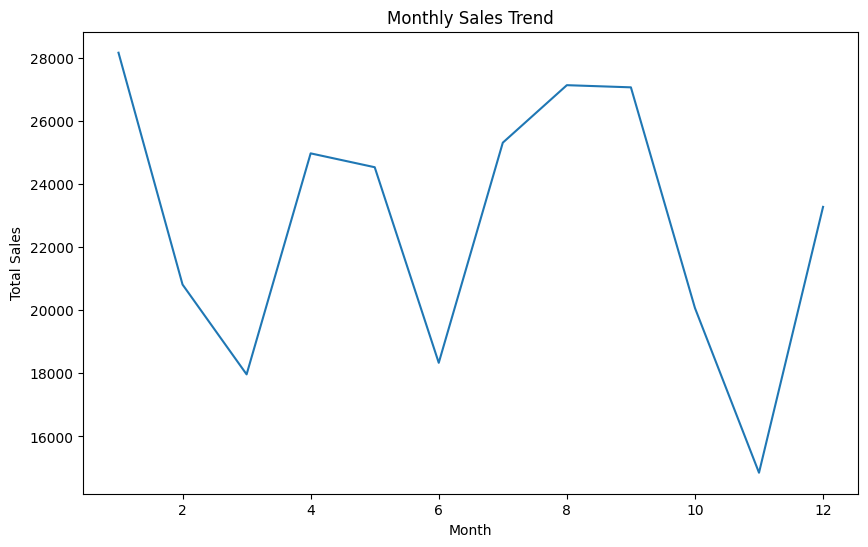

In [5]:
# Analyze distributions of key variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['Quantity'], kde=True)
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Analyze relationships between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', data=merged_data)
plt.title('Relationship between Quantity and Price')
plt.show()

# Explore customer segments
plt.figure(figsize=(10, 6))
customer_spending = merged_data.groupby('CustomerID')['Price'].sum()
sns.histplot(customer_spending, kde=True)
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

# Analyze sales trends over time (if transaction date is available)
if 'TransactionDate' in merged_data.columns:
    merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
    merged_data['Month'] = merged_data['TransactionDate'].dt.month
    monthly_sales = merged_data.groupby('Month')['Price'].sum()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()
else:
    print("TransactionDate column not found in merged_data. Skipping sales trend analysis.")

# Further analysis based on specific business questions
# Examples:
# - Product category analysis: sales by category, most popular categories
# - Customer demographics analysis (if available):  relationship between customer attributes and purchasing behavior
# - Time series analysis (if more granular transaction data is available): daily/weekly sales trends, seasonality


**1.	Top-Selling Products & Revenue Drivers**

Product 29 has the highest deviation from the mean revenue.
Its revenue deviates by 4646.34 from the average revenue of 2725.54.


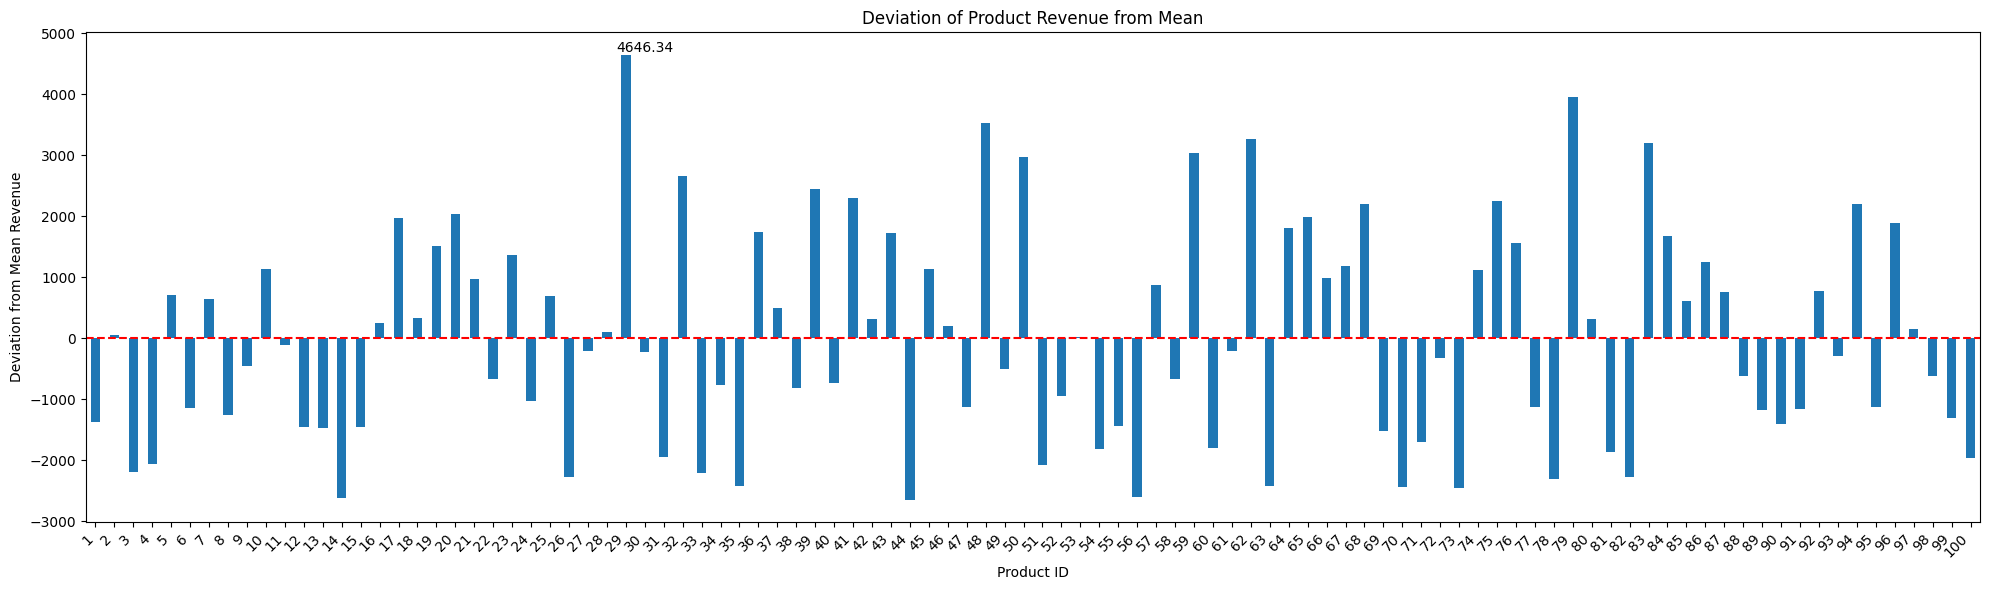

Product 29: Total Revenue = 7371.88,  170.47% difference from average
Product 79: Total Revenue = 6677.92,  145.01% difference from average
Product 48: Total Revenue = 6246.00,  129.17% difference from average
Product 62: Total Revenue = 5986.56,  119.65% difference from average
Product 83: Total Revenue = 5924.36,  117.36% difference from average


In [6]:

# Calculate total revenue for each product
product_revenue = merged_data.groupby('ProductID')['Price'].sum()

# Calculate the mean and standard deviation of product revenue
mean_revenue = product_revenue.mean()
std_revenue = product_revenue.std()

# Calculate the deviation from the mean for each product
revenue_deviation = product_revenue - mean_revenue

# Find the product with the highest deviation from the mean
product_with_highest_deviation = revenue_deviation.abs().idxmax()
highest_deviation = revenue_deviation.loc[product_with_highest_deviation]

# Print insights
print(f"Product {product_with_highest_deviation} has the highest deviation from the mean revenue.")
print(f"Its revenue deviates by {highest_deviation:.2f} from the average revenue of {mean_revenue:.2f}.")


# Plotting the variance of product revenue
plt.figure(figsize=(20, 6))
revenue_deviation.plot(kind='bar')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero
plt.title('Deviation of Product Revenue from Mean')
plt.xlabel('Product ID')
plt.ylabel('Deviation from Mean Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Highlight the product with the highest deviation
plt.text(product_with_highest_deviation, highest_deviation,
         f'{highest_deviation:.2f}', ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


#Further analysis (Example)
top_products = product_revenue.nlargest(5) # Get top 5 products by revenue

for product_id, revenue in top_products.items():
    percentage_difference = ((revenue - mean_revenue) / mean_revenue) * 100
    print(f"Product {product_id}: Total Revenue = {revenue:.2f},  {percentage_difference:.2f}% difference from average")

**Customer Segmentation by Region**

<ipython-input-12-0eb61d5b226b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales['sum'], palette="viridis")


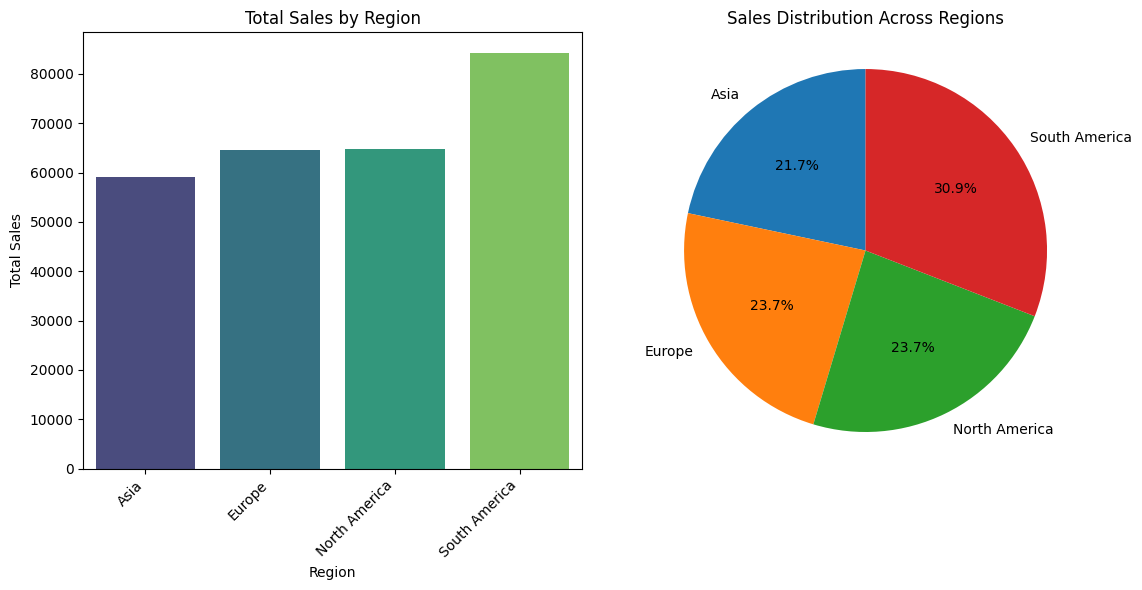


Regional Sales Summary:
                    sum        mean  count Percentage of Total Sales
Region                                                              
Asia           59140.03  271.284541    218                    21.70%
Europe         64483.15  275.569017    234                    23.66%
North America  64719.07  265.242090    244                    23.75%
South America  84211.82  277.012566    304                    30.90%


<ipython-input-12-0eb61d5b226b>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales['mean'], palette="magma")


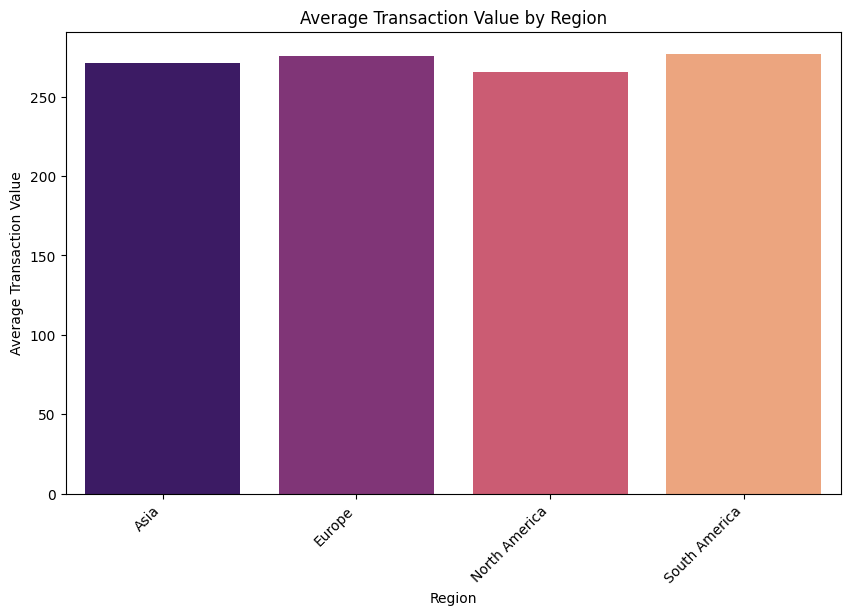

In [12]:
# Customer Segmentation by Region
if 'Region' in merged_data.columns:
    region_sales = merged_data.groupby('Region')['Price'].agg(['sum', 'mean', 'count'])
    region_sales['Percentage of Total Sales'] = (region_sales['sum'] / region_sales['sum'].sum()) * 100

    plt.figure(figsize=(12, 6))

    # Bar plot for total sales by region
    plt.subplot(1, 2, 1)
    sns.barplot(x=region_sales.index, y=region_sales['sum'], palette="viridis")
    plt.title('Total Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')

    # Pie chart for sales distribution across regions
    plt.subplot(1, 2, 2)
    plt.pie(region_sales['Percentage of Total Sales'], labels=region_sales.index, autopct='%1.1f%%', startangle=90)
    plt.title('Sales Distribution Across Regions')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

    # Display regional sales summary with formatting
    print("\nRegional Sales Summary:")
    print(region_sales.to_string(formatters={'Percentage of Total Sales': '{:.2f}%'.format}))

    # Further analysis (Example: Compare average transaction values across regions)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region_sales.index, y=region_sales['mean'], palette="magma")
    plt.title("Average Transaction Value by Region")
    plt.xlabel("Region")
    plt.ylabel("Average Transaction Value")
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("Region column not found in merged_data. Skipping regional analysis.")

**Repeat Customers & Retention Rates**

In [8]:
# Calculate repeat customers and their contribution to revenue
customer_transactions = merged_data.groupby('CustomerID')['TransactionID'].count()
repeat_customers = customer_transactions[customer_transactions > 1]
repeat_customer_revenue = merged_data[merged_data['CustomerID'].isin(repeat_customers.index)].groupby('CustomerID')['Price'].sum()

total_revenue = merged_data['Price'].sum()
repeat_customer_revenue_percentage = (repeat_customer_revenue.sum() / total_revenue) * 100
repeat_customer_percentage = (len(repeat_customers) / len(customer_transactions)) * 100


print(f"{repeat_customer_percentage:.2f}% of customers account for {repeat_customer_revenue_percentage:.2f}% of total revenue, indicating the impact of repeat customers.")

93.97% of customers account for 98.96% of total revenue, indicating the impact of repeat customers.


Revenue earned per top repeat customer vs average revenue earned

Average revenue per customer: 1369.6184422110553

Revenue per top repeat customer:
 CustomerID
141    3857.06
156    3179.64
59     2843.71
65     2758.00
104    2651.24
54     2643.91
175    2608.97
188    2584.90
99     2517.87
21     2468.61
Name: Price, dtype: float64


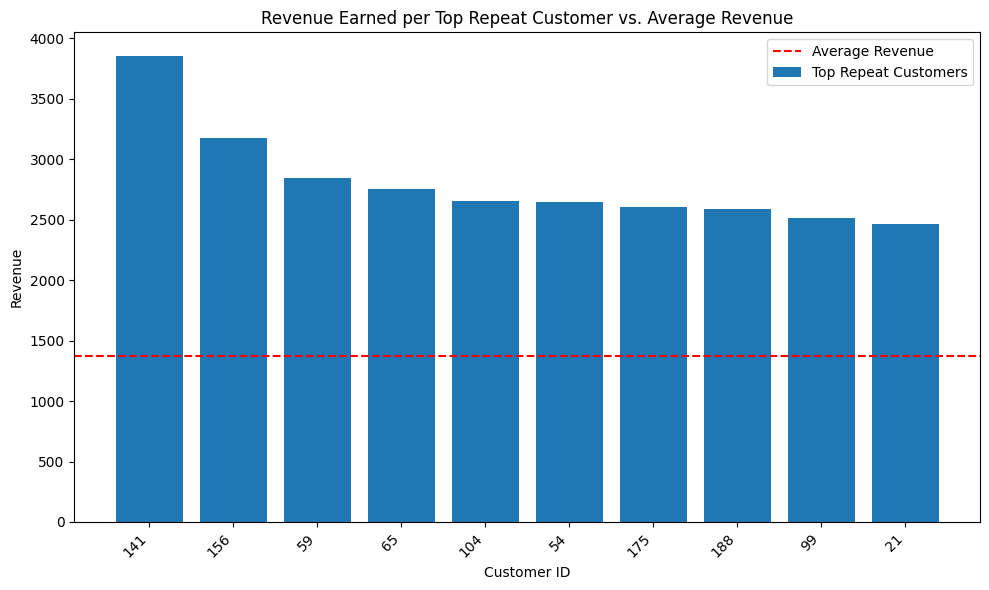

In [18]:
# Calculate average revenue per customer
average_revenue = merged_data['Price'].sum() / merged_data['CustomerID'].nunique()

# Calculate revenue per repeat customer
repeat_customer_revenue = merged_data[merged_data['CustomerID'].isin(repeat_customers.index)].groupby('CustomerID')['Price'].sum()
top_repeat_customers = repeat_customer_revenue.nlargest(10)  # Get top 10 repeat customers by revenue

# Print or visualize the results
print("Average revenue per customer:", average_revenue)
print("\nRevenue per top repeat customer:\n", top_repeat_customers)


# Visualize the comparison
plt.figure(figsize=(10, 6))
plt.bar(top_repeat_customers.index.astype(str), top_repeat_customers.values, label="Top Repeat Customers")
plt.axhline(y=average_revenue, color='red', linestyle='--', label="Average Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.title("Revenue Earned per Top Repeat Customer vs. Average Revenue")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Seasonal Trends in Sales**

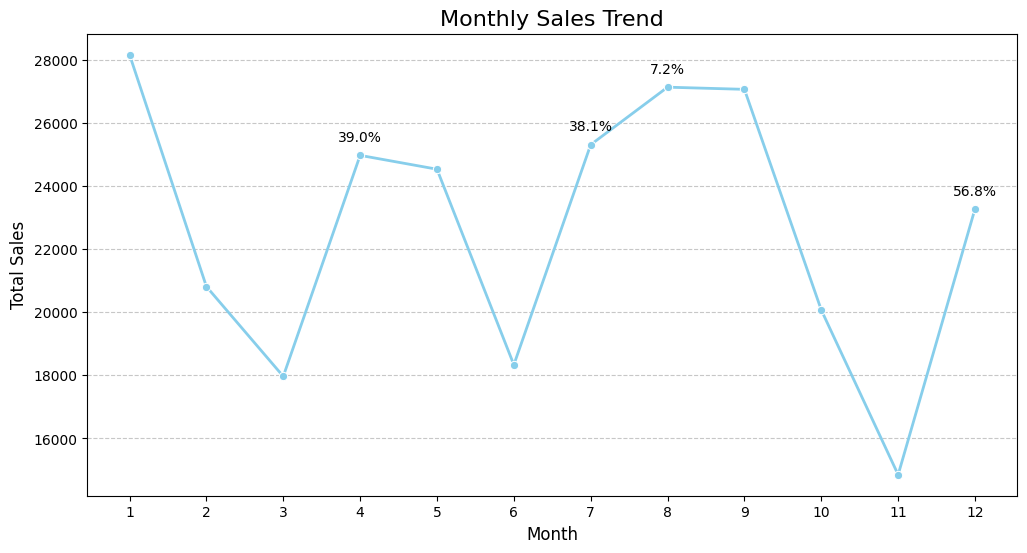

In [9]:
# Analyze sales trends over time (if transaction date is available)
if 'TransactionDate' in merged_data.columns:
    merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
    merged_data['Month'] = merged_data['TransactionDate'].dt.month
    monthly_sales = merged_data.groupby('Month')['Price'].sum()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='skyblue', linewidth=2)  # Added marker and color
    plt.title('Monthly Sales Trend', fontsize=16) # Increased title size
    plt.xlabel('Month', fontsize=12) # Increased label size
    plt.ylabel('Total Sales', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Added grid lines
    plt.xticks(range(1, 13)) # Ensure all months are shown

    # Calculate percentage change
    monthly_sales_change = monthly_sales.pct_change() * 100
    for i in range(1, len(monthly_sales)):
      change = monthly_sales_change[i+1]
      if change > 5:
        plt.annotate(f'{change:.1f}%', (i+1, monthly_sales[i+1]), textcoords="offset points", xytext=(0,10), ha='center')


    plt.show()
else:
    print("TransactionDate column not found in merged_data. Skipping sales trend analysis.")

# ... (Rest of your existing code)

 High-value vs. Low-value Transactions

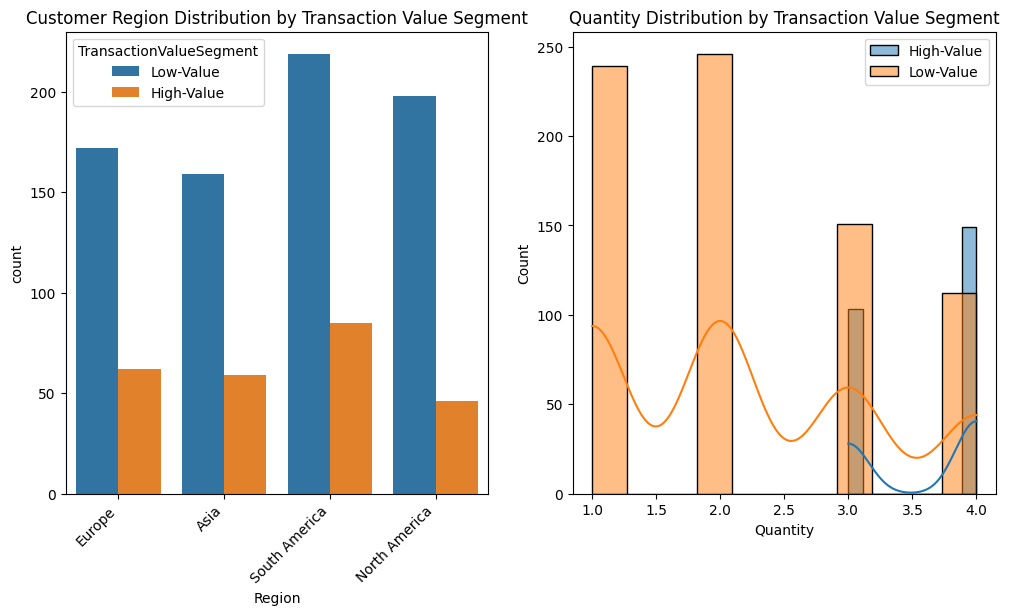

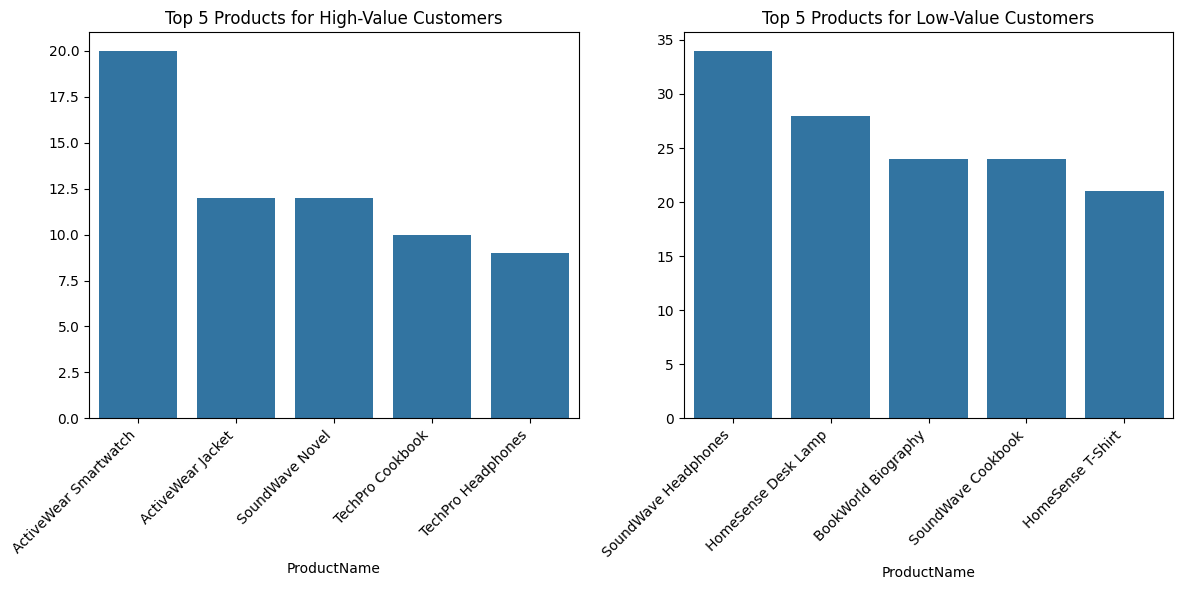

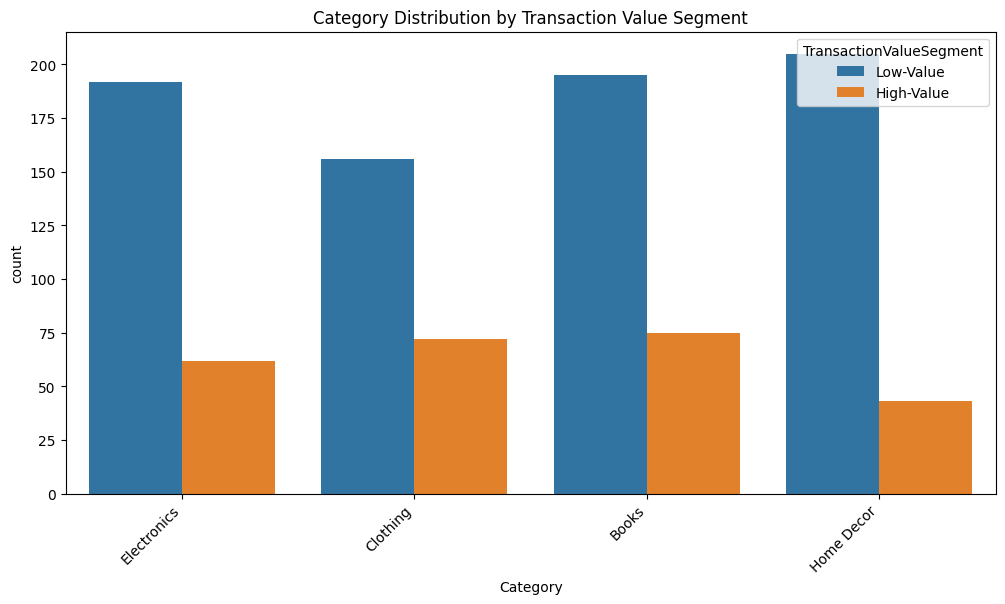

TransactionValueSegment  Category   
High-Value               Books          0.297619
                         Clothing       0.285714
                         Electronics    0.246032
                         Home Decor     0.170635
Low-Value                Home Decor     0.274064
                         Books          0.260695
                         Electronics    0.256684
                         Clothing       0.208556
Name: proportion, dtype: float64


In [10]:
# Define a threshold for high-value transactions (e.g., the 75th percentile)
threshold = merged_data['TotalValue'].quantile(0.75)  # Adjust the quantile as needed
merged_data['TransactionValueSegment'] = merged_data['TotalValue'].apply(lambda x: 'High-Value' if x >= threshold else 'Low-Value')

# Analyze customer demographics and product preferences for each segment
high_value_customers = merged_data[merged_data['TransactionValueSegment'] == 'High-Value']
low_value_customers = merged_data[merged_data['TransactionValueSegment'] == 'Low-Value']


# Customer Demographics Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Region', hue='TransactionValueSegment', data=merged_data)
plt.title('Customer Region Distribution by Transaction Value Segment')
plt.xticks(rotation=45, ha='right')


plt.subplot(1, 2, 2)
sns.histplot(high_value_customers['Quantity'], kde=True, label='High-Value')
sns.histplot(low_value_customers['Quantity'], kde=True, label='Low-Value')
plt.title('Quantity Distribution by Transaction Value Segment')
plt.legend()
plt.show()



# Product Preferences Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
high_value_product_counts = high_value_customers['ProductName'].value_counts().nlargest(5) # Top 5 products
sns.barplot(x=high_value_product_counts.index, y=high_value_product_counts.values)
plt.title('Top 5 Products for High-Value Customers')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
low_value_product_counts = low_value_customers['ProductName'].value_counts().nlargest(5) # Top 5 products
sns.barplot(x=low_value_product_counts.index, y=low_value_product_counts.values)
plt.title('Top 5 Products for Low-Value Customers')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#Further Analysis by Category

plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='TransactionValueSegment', data=merged_data)
plt.title('Category Distribution by Transaction Value Segment')
plt.xticks(rotation=45, ha='right')
plt.show()

print(merged_data.groupby('TransactionValueSegment')['Category'].value_counts(normalize=True))


# ... (Rest of your existing code)